# Project - Breast Cancer Prediction

## 1. Data Preprocessing

In [1]:
# Importing Necessary Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


import warnings
from sklearn.exceptions import ConvergenceWarning

# Suppress warnings
warnings.filterwarnings("ignore", category=ConvergenceWarning)

In [2]:
# Reading the Data File

columns = ["Sample code number", "Clump Thickness",
          "Uniformity of Cell Size", "Uniformity of Cell Shape",
          "Marginal Adhesion", "Single Epithelial Cell Size",
          "Bare Nuclei", "Bland Chromatin", "Normal Nucleoli",
          "Mitoses", "Class"]



data = pd.read_csv("breast-cancer-wisconsin.csv", names=columns)

data.head()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [3]:
data.shape

(699, 11)

In [4]:
# Checking for 'NULL' values

data.isnull().sum()

Sample code number             0
Clump Thickness                0
Uniformity of Cell Size        0
Uniformity of Cell Shape       0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Bland Chromatin                0
Normal Nucleoli                0
Mitoses                        0
Class                          0
dtype: int64

In [5]:
# Checking for Duplicated Instances

data.duplicated().sum()

8

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Sample code number           699 non-null    int64 
 1   Clump Thickness              699 non-null    int64 
 2   Uniformity of Cell Size      699 non-null    int64 
 3   Uniformity of Cell Shape     699 non-null    int64 
 4   Marginal Adhesion            699 non-null    int64 
 5   Single Epithelial Cell Size  699 non-null    int64 
 6   Bare Nuclei                  699 non-null    object
 7   Bland Chromatin              699 non-null    int64 
 8   Normal Nucleoli              699 non-null    int64 
 9   Mitoses                      699 non-null    int64 
 10  Class                        699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


In [7]:
data.describe()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bland Chromatin,Normal Nucleoli,Mitoses,Class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [8]:
# Bare Nuclei tab is missing

In [9]:
data.value_counts('Bare Nuclei')

Bare Nuclei
1     402
10    132
2      30
5      30
3      28
8      21
4      19
?      16
9       9
7       8
6       4
Name: count, dtype: int64

In [10]:
data["Bare Nuclei"] = data["Bare Nuclei"].apply(lambda x: 0 if x == '?' else int(x))

In [11]:
data.value_counts('Bare Nuclei')

Bare Nuclei
1     402
10    132
2      30
5      30
3      28
8      21
4      19
0      16
9       9
7       8
6       4
Name: count, dtype: int64

In [12]:
data.drop(data[(data['Bare Nuclei'] == 0)].index, inplace=True)

In [13]:
data.describe()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
count,6.830000e+02,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000
mean,1.076720e+06,4.442167,3.150805,3.215227,2.830161,3.234261,3.544656,3.445095,2.869693,1.603221,2.699854
std,6.206440e+05,2.820761,3.065145,2.988581,2.864562,2.223085,3.643857,2.449697,3.052666,1.732674,0.954592
min,6.337500e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.776170e+05,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171795e+06,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238705e+06,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


# 2. Classification Models Implementation

## Baseline Evaluation

In [14]:
X = data.drop(['Sample code number','Class'], axis=1)
y = data['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



# Fuction to Plot Confusion Matix

def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title(title)
    plt.show()


In [24]:
# KNN Classifier

knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train, y_train)

knn_pred = knn_classifier.predict(X_test)

knn_accuracy = accuracy_score(y_test, knn_pred)

print("KNN Accuracy:", knn_accuracy)


KNN Accuracy: 0.948905109489051


In [18]:
# Logistic Regression Classifier

lr_classifier = LogisticRegression(max_iter=10000)
lr_classifier.fit(X_train, y_train)

lr_pred = lr_classifier.predict(X_test)

lr_accuracy = accuracy_score(y_test, lr_pred)

print("Logistic Regression Accuracy:", lr_accuracy)

Logistic Regression Accuracy: 0.9562043795620438


In [19]:
# Random Forest Classifier

rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)

rf_pred = rf_classifier.predict(X_test)

rf_accuracy = accuracy_score(y_test, rf_pred)

print("Random Forest Accuracy:", rf_accuracy)

Random Forest Accuracy: 0.9562043795620438


In [20]:
# Neural Network Classifier

nn_classifier = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500)
nn_classifier.fit(X_train, y_train)

nn_pred = nn_classifier.predict(X_test)

nn_accuracy = accuracy_score(y_test, nn_pred)

print("Neural Network Accuracy:", nn_accuracy)

Neural Network Accuracy: 0.927007299270073


## Hyperparameter Tuning

In [29]:
from sklearn.model_selection import GridSearchCV


# Define hyperparameters grid for each classifier
knn_param_grid = {'n_neighbors': list(range(1, 11))}
# lr_param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
# rf_param_grid = {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20, 30]}
# nn_param_grid = {'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50)], 'alpha': [0.0001, 0.001, 0.01, 0.1]}

# GridSearchCV for each classifier
knn_grid_search = GridSearchCV(KNeighborsClassifier(), knn_param_grid, cv=10, scoring='accuracy')
# lr_grid_search = GridSearchCV(LogisticRegression(max_iter=10000), lr_param_grid, cv=5, scoring='accuracy')
# rf_grid_search = GridSearchCV(RandomForestClassifier(), rf_param_grid, cv=5, scoring='accuracy')
# nn_grid_search = GridSearchCV(MLPClassifier(max_iter=500), nn_param_grid, cv=5, scoring='accuracy')


knn_grid_search.fit(X_train, y_train)


knn_results = pd.DataFrame(knn_grid_search.cv_results_)
knn_results[['param_n_neighbors', 'mean_test_score']]

,param_n_neighbors,mean_test_score
0,1,0.957845
1,2,0.943232
2,3,0.963333
3,4,0.963401
4,5,0.967071
5,6,0.967071
6,7,0.968889
7,8,0.965185
8,9,0.965185
9,10,0.965185


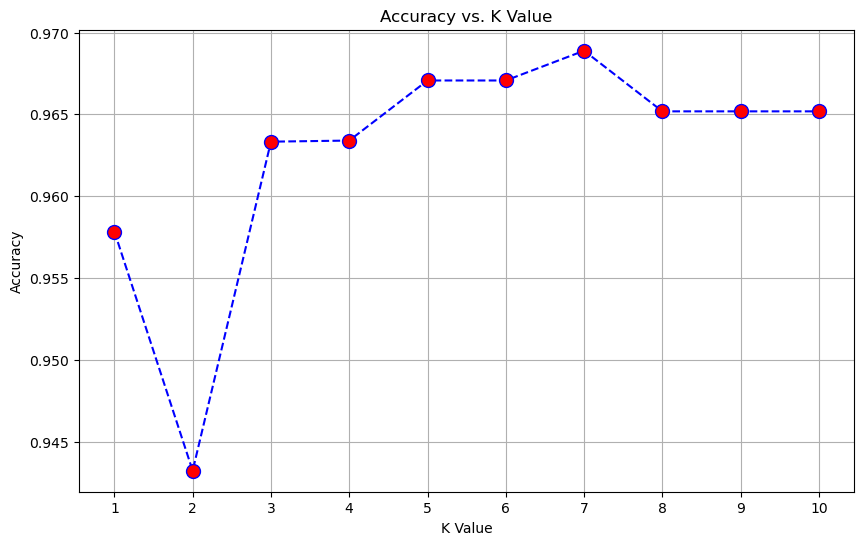

In [30]:
plt.figure(figsize=(10, 6))
plt.plot(knn_results['param_n_neighbors'], knn_results['mean_test_score'], color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Accuracy vs. K Value')
plt.xlabel('K Value')
plt.ylabel('Accuracy')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

In [22]:
# Fit the grid search objects
knn_grid_search.fit(X_train, y_train)
# lr_grid_search.fit(X_train, y_train)
# rf_grid_search.fit(X_train, y_train)
# nn_grid_search.fit(X_train, y_train)

# Best hyperparameters and corresponding accuracy for each classifier
print("KNN Best Params:", knn_grid_search.best_params_)
print("KNN Best Accuracy:", knn_grid_search.best_score_)

# print("Logistic Regression Best Params:", lr_grid_search.best_params_)
# print("Logistic Regression Best Accuracy:", lr_grid_search.best_score_)

# print("Random Forest Best Params:", rf_grid_search.best_params_)
# print("Random Forest Best Accuracy:", rf_grid_search.best_score_)

# print("Neural Network Best Params:", nn_grid_search.best_params_)
# print("Neural Network Best Accuracy:", nn_grid_search.best_score_)

KNN Best Params: {'n_neighbors': 7}
KNN Best Accuracy: 0.968888888888889


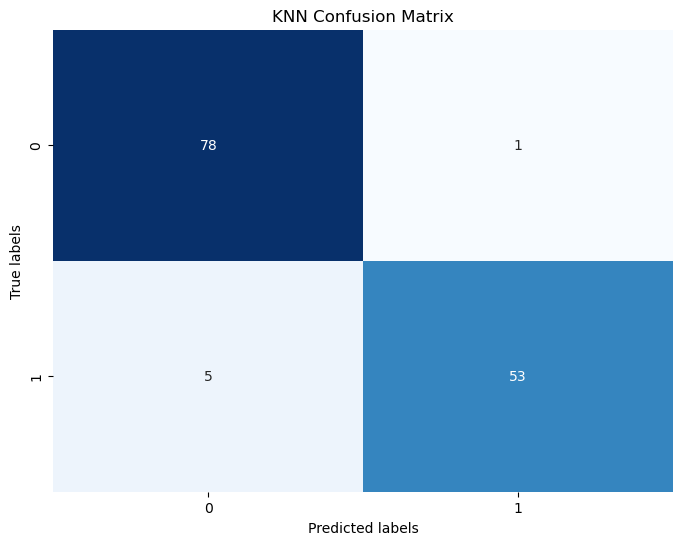

In [23]:
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title(title)
    plt.show()

plot_confusion_matrix(y_test, knn_pred, 'KNN Confusion Matrix')